In [307]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [359]:
#Load stock historical data
nvda_data = pd.read_csv('nvda.csv')
spy_data = pd.read_csv('spy.csv')
# Remove Volume column from both DataFrames
nvda_data.drop(columns=['Volume'], inplace=True)
spy_data.drop(columns=['Volume'], inplace=True)

In [363]:
nvda_data.head()


,Date,Close/Last,Open,High,Low
0,10/11/2024,$134.80,$134.01,$135.78,$133.66
1,10/10/2024,$134.81,$131.91,$135.00,$131.00
2,10/09/2024,$132.65,$134.11,$134.52,$131.38
3,10/08/2024,$132.89,$130.26,$133.48,$129.42
4,10/07/2024,$127.72,$124.99,$130.64,$124.95


In [365]:
spy_data.head()

,Date,Close/Last,Open,High,Low
0,10/11/2024,579.58,576.05,580.3300,575.9100
1,10/10/2024,576.13,575.77,577.5800,574.4900
2,10/9/2024,577.14,573.16,577.7100,572.5500
3,10/8/2024,573.17,570.42,573.7800,569.5299
4,10/7/2024,567.80,571.30,571.9599,566.6300


In [373]:
nvda_data['Date'] = pd.to_datetime(nvda_data['Date'])
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
combined_data = pd.merge(nvda_data, spy_data, on='Date', suffixes=('_nvda', '_spy'))
combined_data.head()

,Date,Close/Last_nvda,Open_nvda,High_nvda,Low_nvda,Close/Last_spy,Open_spy,High_spy,Low_spy
0,2024-10-11,$134.80,$134.01,$135.78,$133.66,579.58,576.05,580.3300,575.9100
1,2024-10-10,$134.81,$131.91,$135.00,$131.00,576.13,575.77,577.5800,574.4900
2,2024-10-09,$132.65,$134.11,$134.52,$131.38,577.14,573.16,577.7100,572.5500
3,2024-10-08,$132.89,$130.26,$133.48,$129.42,573.17,570.42,573.7800,569.5299
4,2024-10-07,$127.72,$124.99,$130.64,$124.95,567.80,571.30,571.9599,566.6300


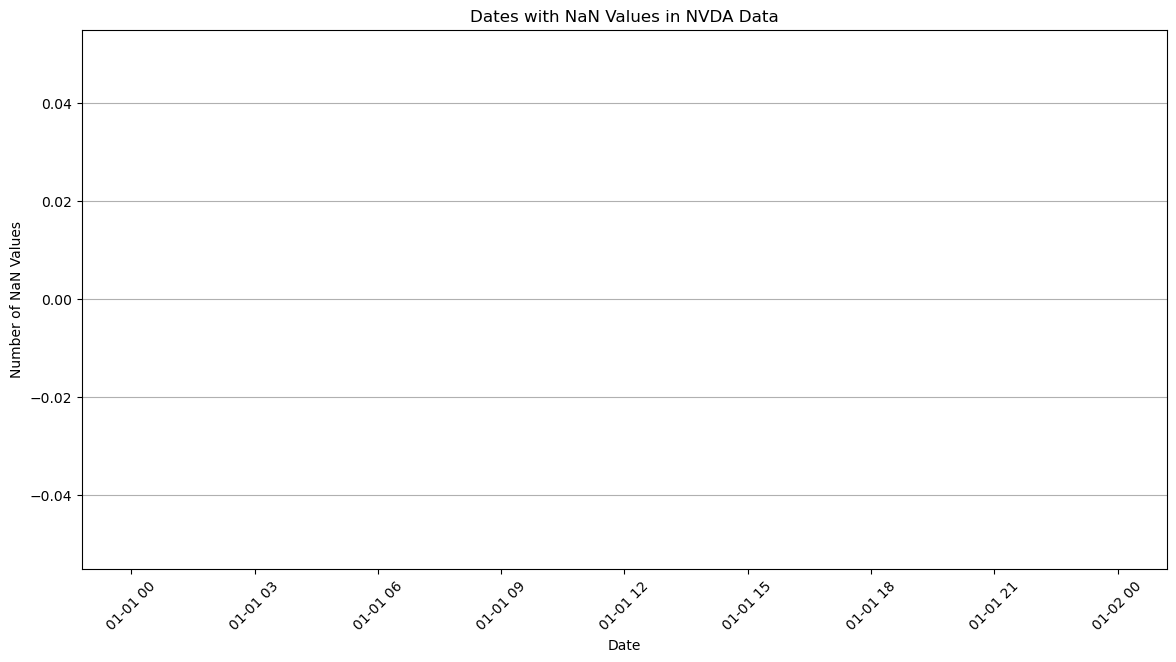

NaN values in relevant columns:
Open_nvda          0
Close/Last_nvda    0
Open_spy           0
Close/Last_spy     0
dtype: int64


In [375]:
# Check for NaN values in the specified columns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_data is already defined and contains the necessary data

# Create a mask for rows with NaN values in the specified columns
nan_mask = combined_data[['Open_nvda', 'Close/Last_nvda']].isna().any(axis=1)

# Extract dates with NaN values
nan_dates = combined_data[nan_mask]['Date']

# Count the occurrences of NaN values per date
nan_counts = nan_dates.value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.bar(nan_counts.index, nan_counts.values, color='red', alpha=0.7)
plt.title('Dates with NaN Values in NVDA Data')
plt.xlabel('Date')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

print("NaN values in relevant columns:")
print(combined_data[['Open_nvda', 'Close/Last_nvda', 'Open_spy', 'Close/Last_spy']].isna().sum())


In [377]:
# Check for NaN values in the specified columns
print("NaN values in relevant columns:")
print(combined_data[['Open_nvda', 'Close/Last_nvda', 'Open_spy', 'Close/Last_spy']].isna().sum())


NaN values in relevant columns:
Open_nvda          0
Close/Last_nvda    0
Open_spy           0
Close/Last_spy     0
dtype: int64


In [379]:
# Define columns to clean and convert
cols_to_clean = ['Open_nvda', 'Close/Last_nvda', 'Open_spy', 'Close/Last_spy']

# Convert columns to string to handle non-string types
for col in cols_to_clean:
    combined_data[col] = combined_data[col].astype(str)  # Convert to string

# Clean the columns by removing dollar signs and extra spaces, then convert to numeric
for col in cols_to_clean:
    combined_data[col] = combined_data[col].str.replace('$', '', regex=False)  # Remove dollar sign
    combined_data[col] = combined_data[col].str.strip()  # Remove any leading/trailing spaces
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')  # Convert to numeric, coercing errors to NaN

In [381]:
cols_to_check = ['Open_nvda', 'Close/Last_nvda', 'Open_spy', 'Close/Last_spy']
scaler = StandardScaler()
combined_data[cols_to_check] = scaler.fit_transform(combined_data[cols_to_check])
print("Scaled data:")
print(combined_data.head())

Scaled data:
        Date  Close/Last_nvda  Open_nvda High_nvda Low_nvda  Close/Last_spy  \
0 2024-10-11         4.317199   4.287475   $135.78  $133.66        2.468255   
1 2024-10-10         4.317568   4.210020   $135.00  $131.00        2.434612   
2 2024-10-09         4.237884   4.291164   $134.52  $131.38        2.444461   
3 2024-10-08         4.246738   4.149162   $133.48  $129.42        2.405747   
4 2024-10-07         4.056012   3.954784   $130.64  $124.95        2.353382   

   Open_spy  High_spy   Low_spy  
0  2.434830  580.3300  575.9100  
1  2.432099  577.5800  574.4900  
2  2.406643  577.7100  572.5500  
3  2.379919  573.7800  569.5299  
4  2.388502  571.9599  566.6300  


In [383]:
# Moving Averages
combined_data['MA50_nvda'] = combined_data['Close/Last_nvda'].rolling(window=50).mean()
combined_data['MA200_nvda'] = combined_data['Close/Last_nvda'].rolling(window=200).mean()
combined_data['MA50_spy'] = combined_data['Close/Last_spy'].rolling(window=50).mean()
combined_data['MA200_spy'] = combined_data['Close/Last_spy'].rolling(window=200).mean()

# Daily Returns
combined_data['Returns_nvda'] = combined_data['Close/Last_nvda'].pct_change()
combined_data['Returns_spy'] = combined_data['Close/Last_spy'].pct_change()

# Volatility (rolling 30-day standard deviation)
combined_data['Volatility_spgi'] = combined_data['Returns_nvda'].rolling(window=30).std()
combined_data['Volatility_spy'] = combined_data['Returns_spy'].rolling(window=30).std()

# Drop NaN values that result from rolling calculations
combined_data.dropna(inplace=True)


In [385]:
# Label 1 if SPGI underperforms SPY, otherwise 0
combined_data['Underperform'] = (combined_data['Returns_nvda'] < combined_data['Returns_spy']).astype(int)

# Optional: Shift the target label by 1 day if you're predicting the next day's performance
combined_data['Target'] = combined_data['Underperform'].shift(-1)

# Drop the last row because of the shift
combined_data.dropna(inplace=True)


In [387]:
from sklearn.model_selection import train_test_split

# Select features for training
features = ['Open_nvda', 'Close/Last_nvda',  'MA50_nvda', 'MA200_nvda', 'Returns_nvda', 
             'Open_spy', 'Close/Last_spy', 'MA50_spy', 'MA200_spy', 'Returns_spy']

X = combined_data[features]  # Features
y = combined_data['Target']  # Target: Whether SPGI underperforms SPY

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [391]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 0.50
              precision    recall  f1-score   support

         0.0       0.49      0.99      0.66       226
         1.0       0.78      0.03      0.06       238

    accuracy                           0.50       464
   macro avg       0.64      0.51      0.36       464
weighted avg       0.64      0.50      0.35       464



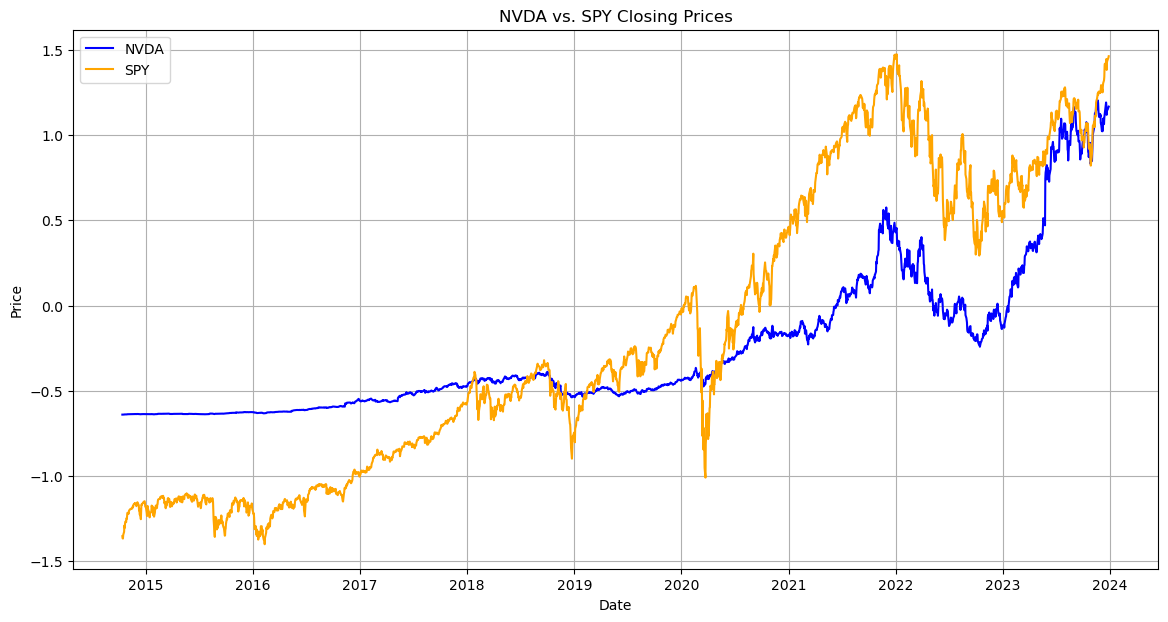

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your combined_data DataFrame, which should contain SPGI and SPY data
# combined_data should already have Date, Close/Last_spgi, Close/Last_spy columns

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(combined_data['Date'], combined_data['Close/Last_nvda'], label='NVDA', color='blue')
plt.plot(combined_data['Date'], combined_data['Close/Last_spy'], label='SPY', color='orange')

plt.title('NVDA vs. SPY Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


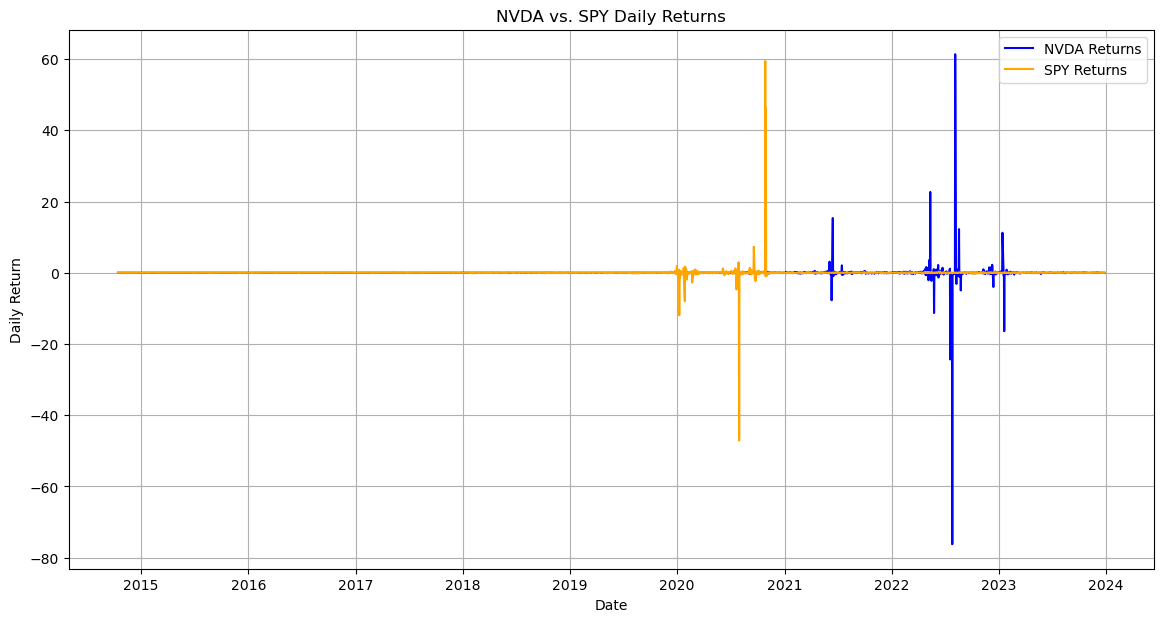

In [395]:
# Calculate daily returns
combined_data['Return_spgi'] = combined_data['Close/Last_nvda'].pct_change()
combined_data['Return_spy'] = combined_data['Close/Last_spy'].pct_change()

# Drop NaN values for returns
combined_data.dropna(inplace=True)

# Plotting returns
plt.figure(figsize=(14, 7))
plt.plot(combined_data['Date'], combined_data['Return_spgi'], label='NVDA Returns', color='blue')
plt.plot(combined_data['Date'], combined_data['Return_spy'], label='SPY Returns', color='orange')

plt.title('NVDA vs. SPY Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid()
plt.show()


In [398]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
combined_data[cols_to_check] = scaler.fit_transform(combined_data[cols_to_check])


In [400]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
combined_data[cols_to_check] = scaler.fit_transform(combined_data[cols_to_check])


In [402]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
combined_data[cols_to_check] = scaler.fit_transform(combined_data[cols_to_check])


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))
